In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class HousingLoan:
    def __init__(self, principal, annual_interest_rate, loan_tenure_years):
        self.principal = principal
        self.annual_interest_rate = annual_interest_rate
        self.monthly_interest_rate = annual_interest_rate / 12 / 100
        self.loan_tenure_months = loan_tenure_years * 12
        self.emi = self.calculate_emi()
    def calculate_emi(self):
        P = self.principal
        r = self.monthly_interest_rate
        n = self.loan_tenure_months
        emi = P * r * (1 + r) ** n / ((1 + r) ** n - 1)
        return emi
    def calculate_total_payment(self):
        return self.emi * self.loan_tenure_months

    def calculate_interest(self):
        return self.calculate_total_payment() - self.principal
    def remaining_balance(self, months_paid):
        P = self.principal
        r = self.monthly_interest_rate
        n = self.loan_tenure_months
        return P * ((1 + r) ** n - (1 + r) ** months_paid) / ((1 + r) ** n - 1)
    def early_closure(self, months_paid):
        remaining_principal = self.remaining_balance(months_paid)
        total_interest_paid = self.calculate_interest()
        interest_remaining = (total_interest_paid / self.loan_tenure_months) * (self.loan_tenure_months - months_paid)
        interest_lost = total_interest_paid - interest_remaining
        return remaining_principal, interest_lost
    def display_emi_chart(self, interest_rates):
        emi_values = [self.calculate_emi_for_rate(rate) for rate in interest_rates]
        plt.plot(interest_rates, emi_values)
        plt.xlabel('Interest Rate (%)')
        plt.ylabel('EMI Amount')
        plt.title('EMI based on Interest Rate')
        plt.grid(True)
        plt.show()
    def calculate_emi_for_rate(self, interest_rate):
        r = interest_rate / 12 / 100
        n = self.loan_tenure_months
        P = self.principal
        emi = P * r * (1 + r) ** n / ((1 + r) ** n - 1)
        return emi


In [12]:
principal = 5000000
annual_interest_rate = 7.5
loan_tenure_years = 20
months_paid = 120


In [13]:
loan = HousingLoan(principal, annual_interest_rate, loan_tenure_years)
emi = loan.emi
total_interest = loan.calculate_interest()

In [9]:
print(f"EMI: {emi:.2f}")
print(f"Total Interest Payable: {total_interest:.2f}")

EMI: 40279.66
Total Interest Payable: 4667118.32


In [10]:
remaining_principal, interest_lost = loan.early_closure(months_paid)
print(f"Remaining Principal after {months_paid} months: {remaining_principal:.2f}")
print(f"Interest lost due to early closure: {interest_lost:.2f}")

Remaining Principal after 120 months: 3393349.57
Interest lost due to early closure: 2333559.16


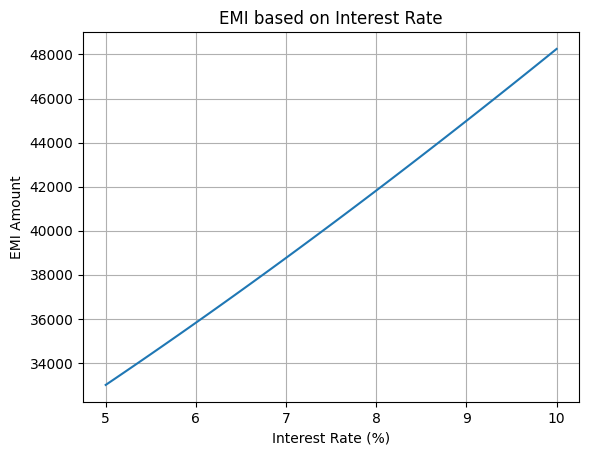

In [11]:
interest_rates = np.linspace(5, 10, 50)
loan.display_emi_chart(interest_rates)